# Import needed libraries

## Import libraries for manipulating the data and statistic

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import  ttest_ind as t_test
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import scipy.special as special
import emoji
from math import pi
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from scipy.stats import friedmanchisquare, rankdata, norm
from scipy.special import gammaln
from math import sqrt

## Import libraries for static ploting

In [52]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

# Statring the test and visulize the data

## Load the data

In [53]:
datafile = "./results/result_naomy3.csv"
df = pd.read_csv(datafile)

In [54]:
df

,Methods,Model,Epsilon,Decay Epsilon,Softmax,Decay Softmax,UCB1,Tomp. Sampl.,Hedge,EXP3,Less Magn.,G. Prune
0,MLP (Reuters),0.786,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.75,0.74
1,LeCun (MNIST),0.980,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.97,0.95
2,AlexNet (IMAGNET),0.500,0.57,0.57,0.55,0.55,0.58,0.58,0.53,0.54,0.53,0.57
3,AlexNet (IMAGNET),0.560,0.58,0.58,0.56,0.56,0.57,0.57,0.56,0.56,0.55,0.54
4,Conv (Cifar10),0.810,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.81,0.80
5,Conv (Cifar100),0.430,0.45,0.45,0.44,0.45,0.45,0.45,0.44,0.44,0.43,0.41
6,Conv (IMDB),0.870,0.89,0.89,0.88,0.89,0.89,0.89,0.89,0.88,0.83,0.84
7,Conv (SVHN),0.960,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.90,0.92
8,Siamese Graph (MNIST),0.990,1.00,0.99,0.99,0.99,1.00,1.00,0.99,0.99,0.93,0.93
9,LSTM (IMDB),0.800,0.81,0.81,0.81,0.81,0.81,0.81,0.81,0.81,0.79,0.78


In [55]:
df1 = df.copy()



## Using Nonparametric tests

I am not sure the data comes from Guassian distribution  and less than 30 sample 

### alternative to paired t-test when data has an ordinary scale or when not
### normally distributed

## Start comparining all pruning algorithms

### Compute friedman test test by ranks between pruning methods

In [56]:
df1.rank(axis=1)

,Model,Epsilon,Decay Epsilon,Softmax,Decay Softmax,UCB1,Tomp. Sampl.,Hedge,EXP3,Less Magn.,G. Prune
0,3.0,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,2.0,1.0
1,3.0,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,2.0,1.0
2,1.0,8.0,8.0,5.5,5.5,10.5,10.5,2.5,4.0,2.5,8.0
3,5.0,10.5,10.5,5.0,5.0,8.5,8.5,5.0,5.0,2.0,1.0
4,2.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,2.5,1.0
5,2.5,9.0,9.0,5.0,9.0,9.0,9.0,5.0,5.0,2.5,1.0
6,3.0,8.5,8.5,4.5,8.5,8.5,8.5,8.5,4.5,1.0,2.0
7,3.0,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,1.0,2.0
8,5.5,10.0,5.5,5.5,5.5,10.0,10.0,5.5,5.5,1.5,1.5
9,3.0,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,2.0,1.0


In [57]:
df1.rank(axis=1).mean()

Model            3.321429
Epsilon          8.107143
Decay Epsilon    7.607143
Softmax          6.642857
Decay Softmax    6.964286
UCB1             8.678571
Tomp. Sampl.     8.142857
Hedge            6.714286
EXP3             6.035714
Less Magn.       1.750000
G. Prune         2.035714
dtype: float64

In [58]:
df1.head(2)

,Methods,Model,Epsilon,Decay Epsilon,Softmax,Decay Softmax,UCB1,Tomp. Sampl.,Hedge,EXP3,Less Magn.,G. Prune
0,MLP (Reuters),0.786,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.75,0.74
1,LeCun (MNIST),0.980,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.97,0.95


In [59]:
data =  np.stack((
               df1['Model'], df1['Epsilon'],df1['Decay Epsilon'], df1['Softmax'],
               df1['Decay Softmax'], df1['UCB1'], df1['Tomp. Sampl.'],
               df1['Hedge'], df1['EXP3'], df1['Less Magn.'], df1['G. Prune']))

In [60]:
print(friedmanchisquare(df1['Model'], df1['Epsilon'],df1['Decay Epsilon'], df1['Softmax'],
               df1['Decay Softmax'], df1['UCB1'], df1['Tomp. Sampl.'],
               df1['Hedge'], df1['EXP3'], df1['Less Magn.'], df1['G. Prune']))

FriedmanchisquareResult(statistic=99.942052980132459, pvalue=5.5971866072224732e-17)


exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [61]:
meanRanks = df1.rank(axis=1).mean() 

In [62]:
lst = list(df1.columns.values)
lst.remove('Methods')

In [63]:
len(lst)

11

In [64]:
df1.iloc[1].size

12

In [65]:
q = 3.21865# pvalue = 0.05 and number of datasets 3.426041249
#q = 3.029694463 # pvalue = 0.1
N = (df1['Model'].size)
k = (df1.iloc[1].size)-1

In [66]:
CD = q * sqrt(k*(k+1)/(6.0*N))

In [67]:
CD

4.03479130363995

In [68]:
lst

['Model',
 'Epsilon',
 'Decay Epsilon',
 'Softmax',
 'Decay Softmax',
 'UCB1',
 'Tomp. Sampl.',
 'Hedge',
 'EXP3',
 'Less Magn.',
 'G. Prune']

In [69]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Model 3.32142857143

 Epsilon 8.10714285714

 Decay Epsilon 7.60714285714

 Softmax 6.64285714286

 Decay Softmax 6.96428571429

 UCB1 8.67857142857

 Tomp. Sampl. 8.14285714286

 Hedge 6.71428571429

 EXP3 6.03571428571

 Less Magn. 1.75

 G. Prune 2.03571428571


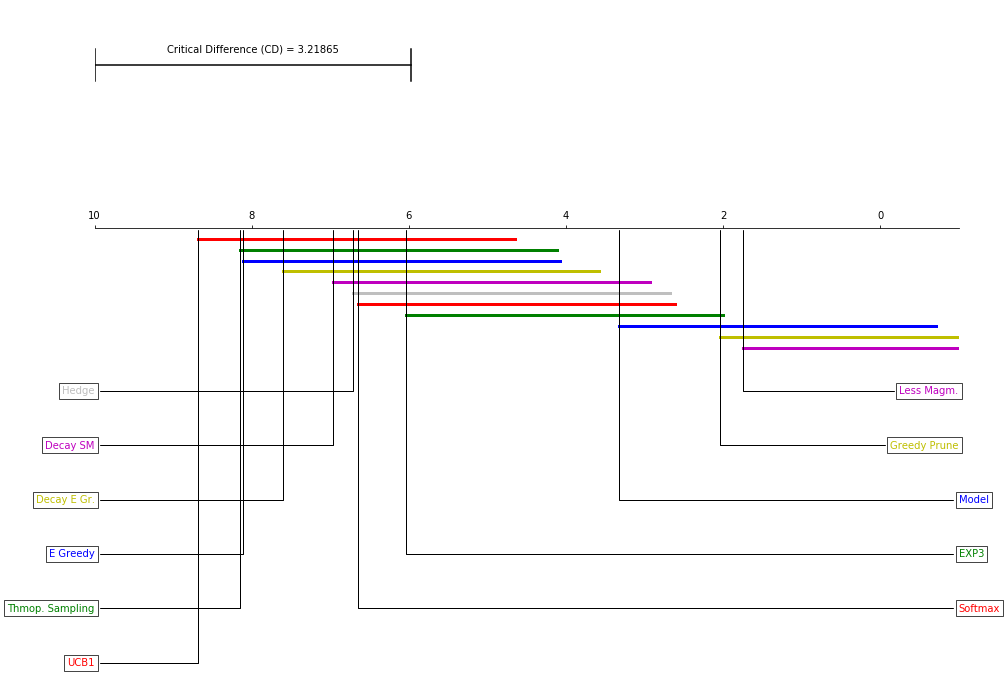

In [70]:
# input data
cd = CD
limits=(10,-1)
fig, ax = plt.subplots(figsize=(20,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD) = 3.21865", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")


ax.annotate("UCB1", xy=(meanRanks[5], 0.6), xytext=(0,-0.2),ha="right",  **kw, color="r")
ax.annotate("Thmop. Sampling", xy=(meanRanks[6], 0.6), xytext=(0,-0.1),ha="right",  **kw, color="g")
ax.annotate("E Greedy", xy=(meanRanks[1], 0.6), xytext=(0,0),ha="right",  **kw, color="b")
ax.annotate("Decay E Gr.", xy=(meanRanks[2], 0.6), xytext=(0,0.1),ha="right",  **kw, color="y")
ax.annotate("Decay SM", xy=(meanRanks[4], 0.6), xytext=(0,0.2),ha="right",  **kw, color="m")
ax.annotate("Hedge", xy=(meanRanks[7], 0.6), xytext=(0,0.3),ha="right",  **kw, color="0.75")

ax.annotate("Softmax", xy=(meanRanks[3], 0.6), xytext=(1,-0.1),ha="left",  **kw, color="r")
ax.annotate("EXP3", xy=(meanRanks[8], 0.6), xytext=(1,0),ha="left",  **kw, color="g")
ax.annotate("Model", xy=(meanRanks[0], 0.6), xytext=(1,0.1),ha="left",  **kw, color="b")
ax.annotate("Greedy Prune", xy=(meanRanks[10], 0.6), xytext=(1,0.2),ha="right",  **kw, color="y")
ax.annotate("Less Magm.", xy=(meanRanks[9], 0.6), xytext=(1,0.3),ha="right",  **kw, color="m")

#bars
ax.plot([meanRanks[5],meanRanks[5]-CD],[0.58,0.58], color="r", lw=3)
ax.plot([meanRanks[6],meanRanks[6]-CD],[0.56,0.56], color="g", lw=3)
ax.plot([meanRanks[1],meanRanks[1]-CD],[0.54,0.54], color="b", lw=3)
ax.plot([meanRanks[2],meanRanks[2]-CD],[0.52,0.52], color="y", lw=3)
ax.plot([meanRanks[4],meanRanks[4]-CD],[0.5,0.5], color="m", lw=3)
ax.plot([meanRanks[7],meanRanks[7]-CD],[0.48,0.48], color="0.75", lw=3)
ax.plot([meanRanks[3],meanRanks[3]-CD],[0.46,0.46], color="r", lw=3)
ax.plot([meanRanks[8],meanRanks[8]-CD],[0.44,0.44], color="g", lw=3)
ax.plot([meanRanks[0],meanRanks[0]-CD],[0.42,0.42], color="b", lw=3)
ax.plot([meanRanks[10],meanRanks[10]-CD],[0.40,0.40], color="y", lw=3)
ax.plot([meanRanks[9],meanRanks[9]-CD],[0.38,0.38], color="m", lw=3)






plt.show()